In [50]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 

In [51]:
df = pd.read_csv('titanic.csv')
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df2 = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns')
df2.head(10) 

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [53]:
df2.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [54]:
df2.shape 

(891, 5)

In [55]:
df2['Age'].fillna(df2.Age.median(), inplace=True)  

C:\Users\madhu\AppData\Local\Temp\ipykernel_8028\3048939463.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Age'].fillna(df2.Age.median(), inplace=True)


In [56]:
df2.isnull().sum() 

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [57]:
df2.head() 

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


<Axes: xlabel='Pclass'>

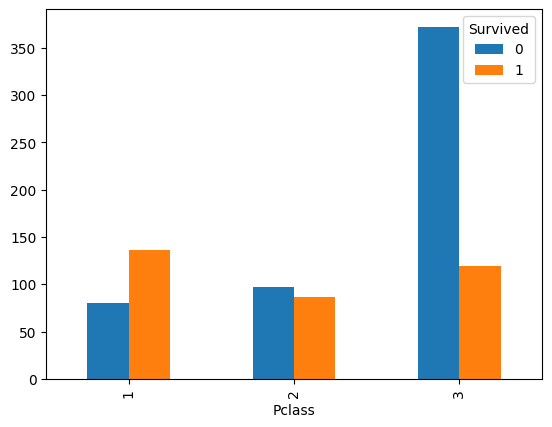

In [58]:
pd.crosstab(df2.Pclass, df2.Survived).plot(kind='bar')

In [59]:
df2['Fare'].describe() 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x176c9757470>,
 'caps': [<matplotlib.lines.Line2D at 0x176c9756cf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x176c9757aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x176c9756180>],
 'fliers': [<matplotlib.lines.Line2D at 0x176c9757500>],
 'means': []}

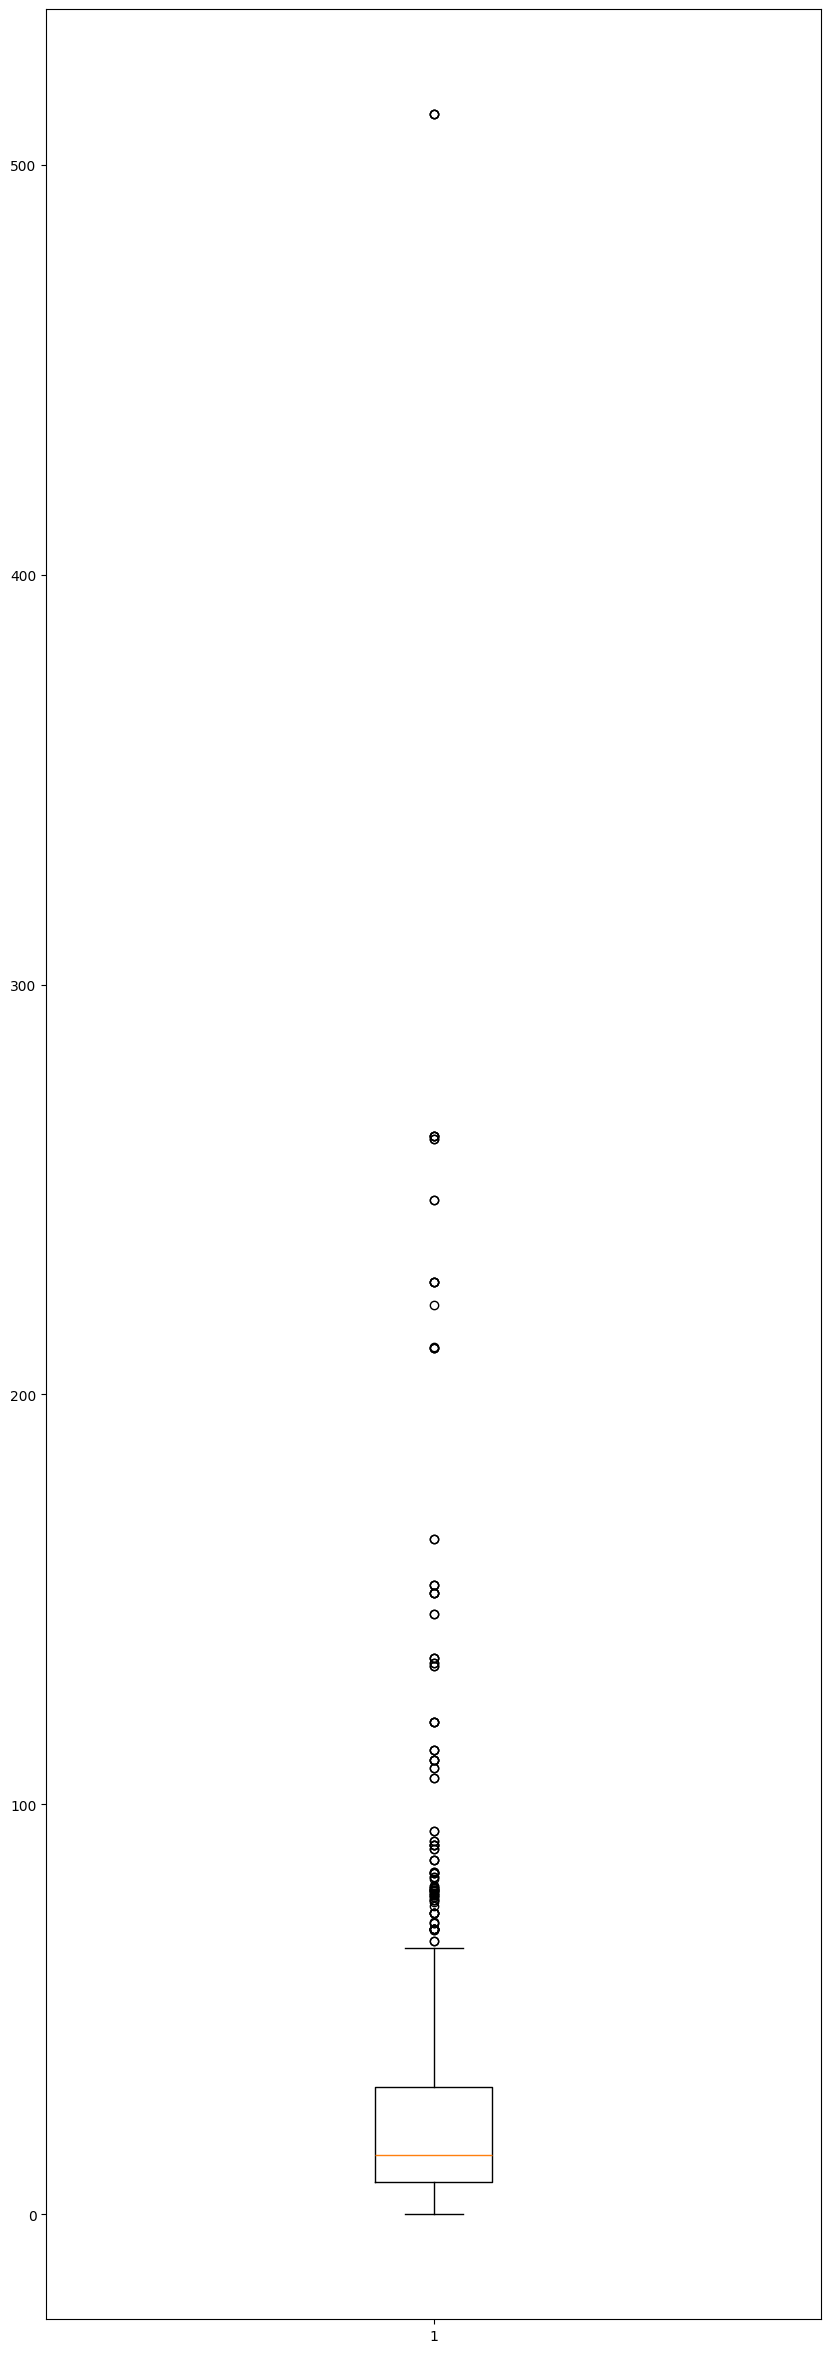

In [90]:
plt.figure(figsize=(10,30))
plt.boxplot(df2['Fare'])

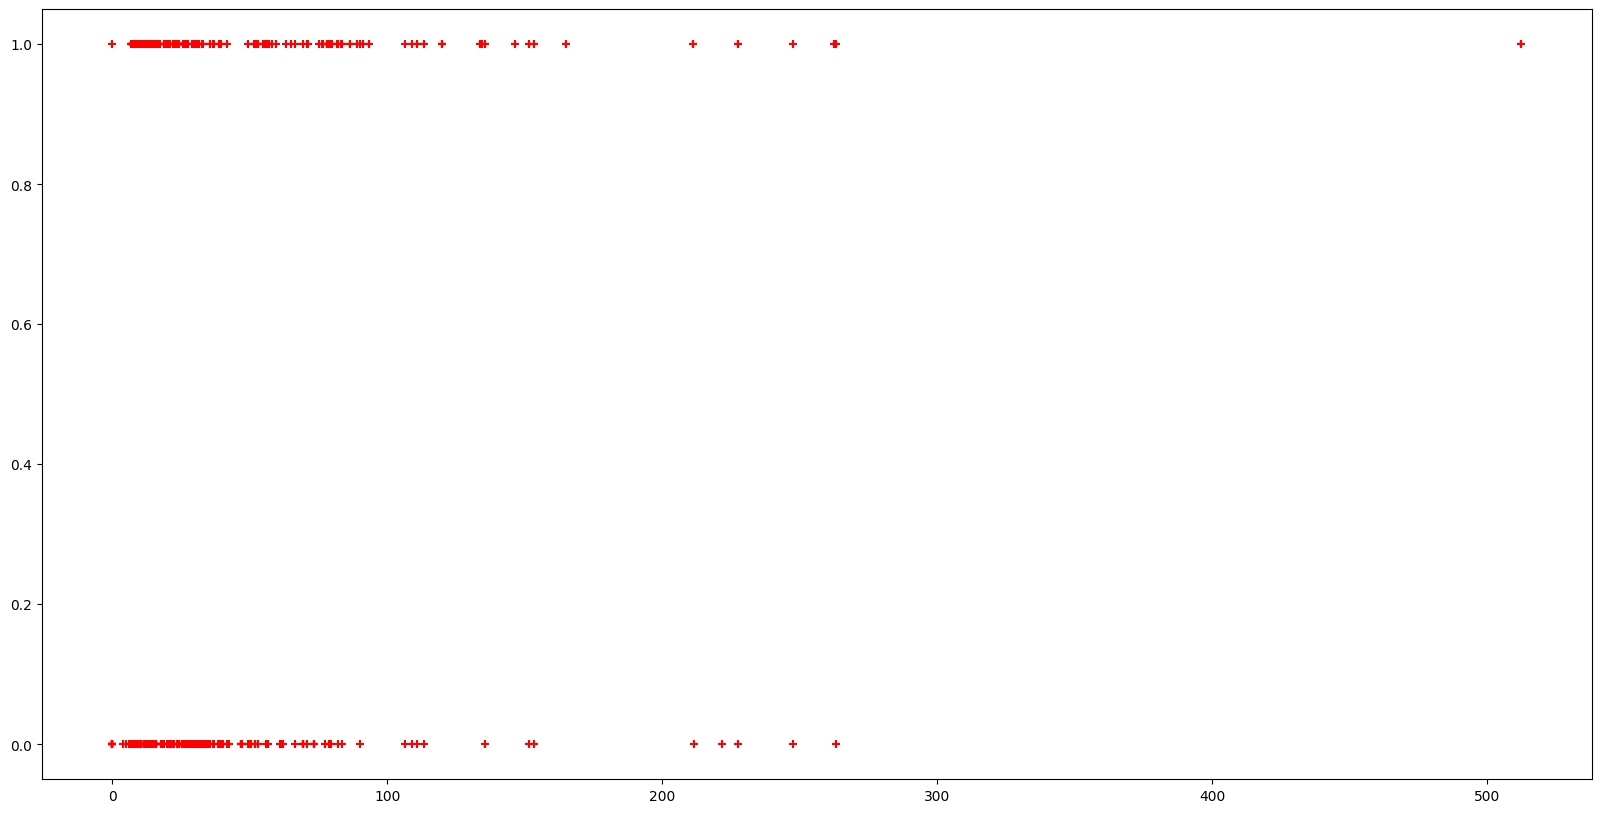

In [60]:
plt.figure(figsize=(20,10))
plt.scatter(df2['Fare'], df2['Survived'], marker='+', color='red') 

In [61]:
Q1, Q3 = df2['Fare'].quantile([0.25,0.75]) 

IQR = Q3 - Q1 

upper_limit = Q3 + 1.5*IQR 
lower_limit = Q1 - 1.5*IQR 

upper_limit, lower_limit, Q1, Q3, IQR 

(65.6344, -26.724, 7.9104, 31.0, 23.0896)

In [62]:
df3 = df2[(df2['Fare']>lower_limit) & (df2['Fare']<upper_limit)]
df3.shape

(775, 5)

Text(0, 0.5, 'Count')

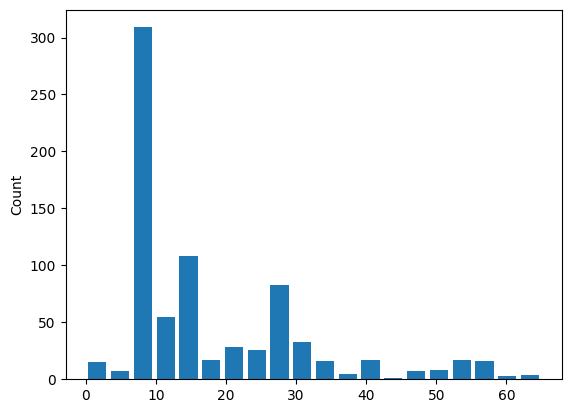

In [63]:
plt.hist(df3['Fare'], bins=20, rwidth=0.8)
plt.xlabel = 'Fare'
plt.ylabel('Count') 

In [64]:
df3['Pclass'].unique() 

array([3, 1, 2])

In [65]:
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder() 

In [66]:
df3['Sex_n'] = le_Sex.fit_transform(df3['Sex'])

C:\Users\madhu\AppData\Local\Temp\ipykernel_8028\2773828503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Sex_n'] = le_Sex.fit_transform(df3['Sex'])


In [67]:
df3.drop('Sex', axis='columns', inplace=True)

C:\Users\madhu\AppData\Local\Temp\ipykernel_8028\3593314205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop('Sex', axis='columns', inplace=True)


In [68]:
df3.head() 

,Survived,Pclass,Age,Fare,Sex_n
0,0,3,22.0,7.2500,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
5,0,3,28.0,8.4583,1


In [69]:
X = df3.drop('Survived', axis='columns')
y = df3['Survived']

In [82]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [83]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() 
model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [84]:
model.score(X_test, y_test) 

0.7682403433476395